In [1]:
import pandas as pd
from pysentimiento import create_analyzer
from pysentimiento.preprocessing import preprocess_tweet
import matplotlib.pyplot as plt

df = pd.read_csv("comentarios.csv")
def limpiar_comentario(comentario):
    return preprocess_tweet(comentario, lang="es")

df['post_limpio'] = df['post'].apply(limpiar_comentario)

C:\Users\Rodrigo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Definir una función para aplicar emotion_analyzer.predict() a cada comentario
def detectar_emociones(comentario):
    resultado = emotion_analyzer.predict(comentario)
    emocion = resultado.output
    probabilidad = resultado.probas.get(emocion, 0)  # Obtener la probabilidad de la emoción predominante
    return emocion, probabilidad

In [3]:
emotion_analyzer = create_analyzer(task="emotion", lang="es")

C:\Users\Rodrigo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\accelerate\accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


In [4]:
df[['emocion_predominante', 'probabilidad_emocion']] = df['post_limpio'].apply(detectar_emociones).apply(pd.Series)

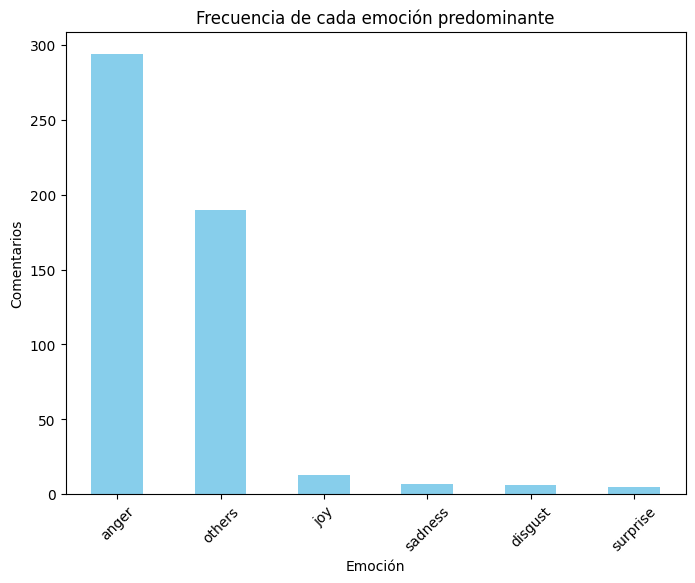

In [7]:

# Graficar un gráfico de barras de la frecuencia de cada emoción predominante
plt.figure(figsize=(8, 6))
df['emocion_predominante'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Frecuencia de cada emoción predominante')
plt.xlabel('Emoción')
plt.ylabel('Comentarios')
plt.xticks(rotation=45)
plt.show()